# 时间序列数据建模分析
* 按研究对象分类：一元时间序列和多元时间序列
* 按时间参数分类：离散时间序列和连续时间序列
* 按统计特性分类：平稳时间序列和非平稳时间序列
* 按分布规律分类：高斯型时间序列和非高斯型时间序列

<Axes: xlabel='year'>

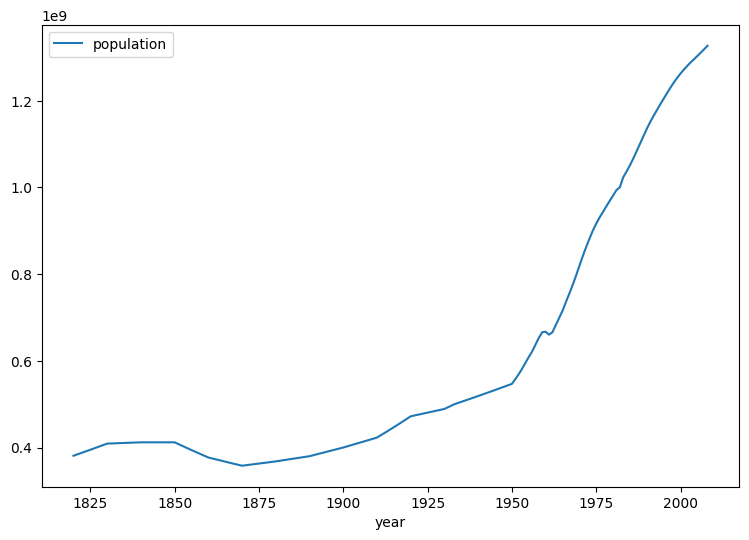

In [1]:
# 序列平稳性检验
# 简单来讲，如果一张时序图呈现出明显的增长和下降趋势，那么就一定不平稳
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

series1 = pd.read_csv("total-population.csv", index_col=0)
series1.plot(figsize=(9, 6))

(5.0, -5.0)

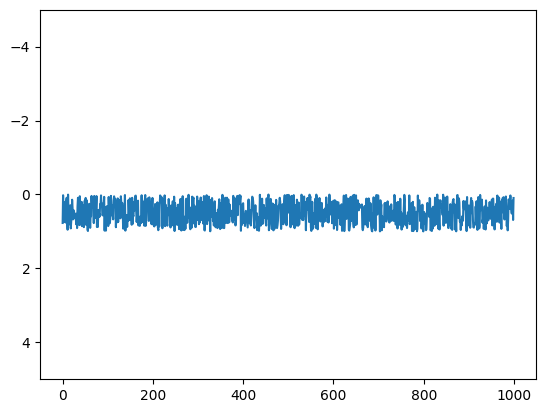

In [4]:
import numpy as np

np.random.seed(10)  # 随机数种子
series2 = np.random.rand(1000)  # 生成随机序列
plt.plot(series2)  # 绘图
plt.ylim(5, -5)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

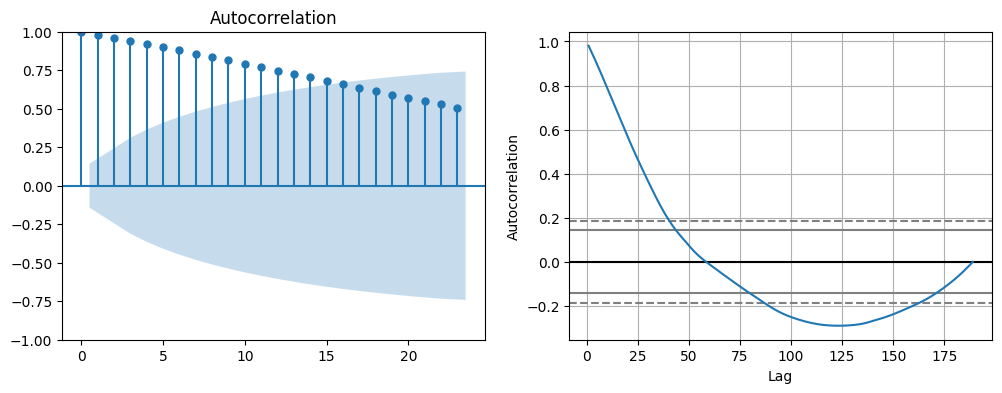

In [2]:
# 自相关图
# 可以利用 statsmodels 统计计算库中的 plot_acf() 函数计算和绘制自相关图
# 也可以使用 Pandas 提供的 autocorrelation_plot() 方法绘制

from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plot_acf(series1, ax=axes[0])
autocorrelation_plot(series1, ax=axes[1])

平稳序列通常具有短期相关性。该性质用自相关系数来描述就是随着延迟k的增加，平稳序列的自相关系数会很快地衰减向零

非平稳序列的自相关系数衰减向零的速度通常比较慢

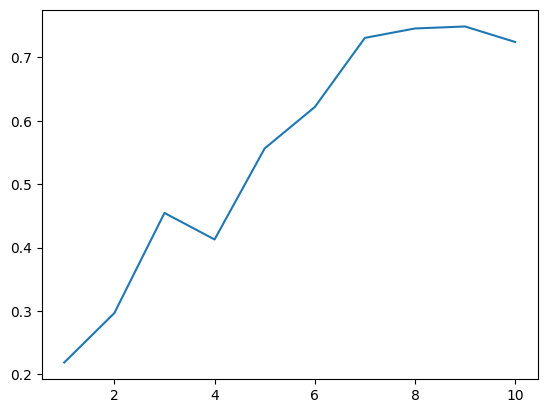

In [ ]:
# 纯随机性检验
# 如果 LB 统计量的 P 值小于 0.05，我们则认为该序列为非随机序列，否则就为随机序列
from statsmodels.stats.diagnostic import acorr_ljungbox

P2 = acorr_ljungbox(series2).lb_pvalue
plt.plot(P2)

<Axes: >

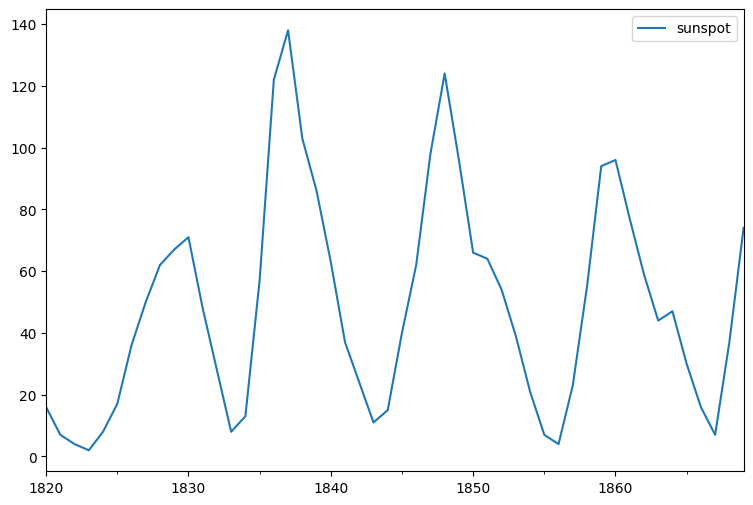

In [6]:
# 1820-1870 年的太阳黑子统计数据 series
series3 = pd.read_csv("sunspot.csv", index_col=0)
series3.index = pd.period_range("1820", "1869", freq="Y")  # 将索引转换为时间
series3.plot(figsize=(9, 6))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

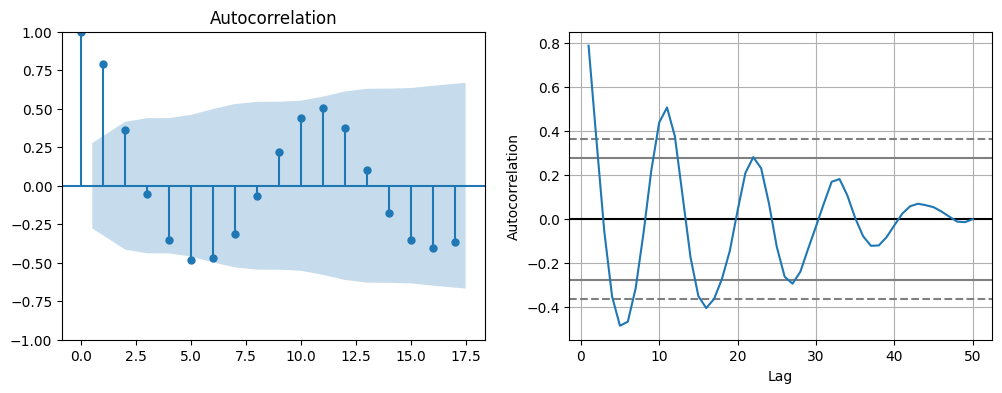

In [7]:
# 平稳性检验
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plot_acf(series3, ax=axes[0])
autocorrelation_plot(series3, ax=axes[1])

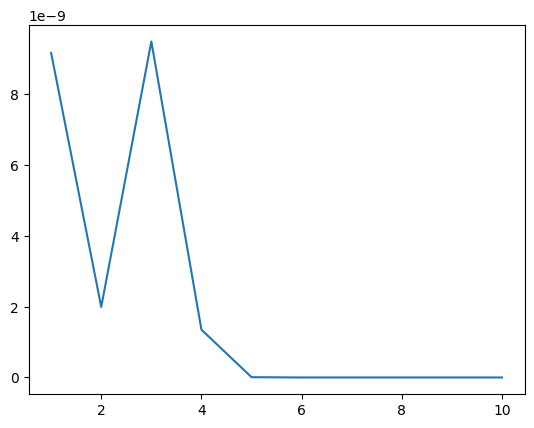

In [8]:
# 纯随机性检验
P3 = acorr_ljungbox(series3).lb_pvalue
plt.plot(P3)

In [9]:
# ARMA介绍及建模
from statsmodels.tsa.arima.model import ARIMA

train_data = series3[:-10]  # 80% 训练
test_data = series3[-10:]
arma = ARIMA(train_data, order=(2, 0, 1)).fit()  # 定义并训练模型
arma.forecast(steps=10).values

array([111.37037426, 100.57459251,  75.88578406,  51.33635496,
        35.7396313 ,  31.42983112,  35.80573071,  44.08789215,
        51.84682426,  56.47354709])